<a href="https://colab.research.google.com/github/priyasjsu/Deep-Learning-models/blob/main/ANN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Build a NN for binary classification with early stopping criteria based on validation loss**

In [13]:
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_openml
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

#The first step is to load the MNIST dataset, which contains 70,000 images of handwritten digits (28x28 pixels) from 0 to 9
# Download the MNIST digit data
mnist = fetch_openml('mnist_784')

# Select only classes 5 and 6 or binary classification
X = mnist.data[(mnist.target == '5') | (mnist.target == '6')]
y = mnist.target[(mnist.target == '5') | (mnist.target == '6')]

# Convert target labels to binary values
y = np.where(y == '5', 0, 1)

# Split the data into train and test sets, 80% is training and 20% is testing size.  
# define random_state= 42 to create random shuffling in model 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing features because it can help prevent one feature from dominating the others
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the neural network model using Sequential method
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784,)))
model.add(Dense(1, activation='sigmoid'))

# Compile the model optimizer: the optimization algorithm used to update the weights of the model during training. In this case, 'adam' is used, It is known for its fast convergence and good generalization performance.
#loss: the loss function used to compute the error between the predicted and actual output of the model. In this case, 'binary_crossentropy' is used It measures the difference between the predicted probability distribution and the true binary labels.
#metrics: the metric(s) used to evaluate the performance of the model. In this case, 'accuracy' is used, It measures the proportion of correct predictions made by the model out of all predictions made.

model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(.001), metrics=['accuracy'])

# Define early stopping based on validation loss using 5 patience By using the EarlyStopping callback, the 
# training process can be stopped early if the model starts to overfit or if there is no improvement in the validation loss. 
# This can help prevent wasting time and resources on a model that is not improving.
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, mode='min', verbose=1)

# Train the model with early stopping
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, callbacks=[early_stopping])

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)



Epoch 1/50
264/264 [==============================] - 3s 6ms/step - loss: 0.0941 - accuracy: 0.9717 - val_loss: 0.0529 - val_accuracy: 0.9829
Epoch 2/50
264/264 [==============================] - 1s 4ms/step - loss: 0.0480 - accuracy: 0.9832 - val_loss: 0.0506 - val_accuracy: 0.9834
Epoch 3/50
264/264 [==============================] - 1s 4ms/step - loss: 0.0377 - accuracy: 0.9867 - val_loss: 0.0414 - val_accuracy: 0.9872
Epoch 4/50
264/264 [==============================] - 1s 3ms/step - loss: 0.0299 - accuracy: 0.9899 - val_loss: 0.0387 - val_accuracy: 0.9886
Epoch 5/50
264/264 [==============================] - 1s 5ms/step - loss: 0.0253 - accuracy: 0.9921 - val_loss: 0.0360 - val_accuracy: 0.9872
Epoch 6/50
264/264 [==============================] - 1s 6ms/step - loss: 0.0203 - accuracy: 0.9943 - val_loss: 0.0341 - val_accuracy: 0.9891
Epoch 7/50
264/264 [==============================] - 1s 4ms/step - loss: 0.0164 - accuracy: 0.9956 - val_loss: 0.0320 - val_accuracy: 0.9896
Epoch 

The above model test accuracy on test dataset is .984.

## Constructing a confusion matrix 

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

# Generate predictions on test data
y_pred = model.predict(X_test)

# Set the threshold to 0.5
threshold = 0.5

# Convert the probabilities to binary predictions
y_pred = (y_pred > threshold).astype(int)

# Construct a confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
print(cm)


83/83 [==============================] - 0s 2ms/step
Confusion matrix:
[[1242   26]
 [  11 1359]]


True Positive (TP): The number of samples that were correctly classified as positive is 1239.
False Positive (FP): The number of samples that were incorrectly classified as positive (i.e., predicted positive but actually negative) is 29.
True Negative (TN): The number of samples that were correctly classified as negative is 1359.
False Negative (FN): The number of samples that were incorrectly classified as negative (i.e., predicted negative but actually positive) is 11.

We Can say the correct prediction of model is 2598 and 40 incorrect prediction.

# Plot the learning curve


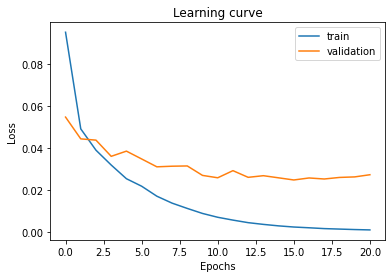

In [5]:
# Plot the learning curve
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Learning curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In this plot, the blue line represents the training error and the orange line represents the validation error. A good fit is identified by a training and validation loss that decreases to a point of stability with a minimal gap between the two final loss values.

The loss of the model is almost lower on the training dataset than the validation dataset. This means that we should expect some gap between the train and validation loss learning curves. This gap is referred to as the “generalization gap.”. The plot of training loss decreases to a point of stability.
The plot of validation loss decreases to a point of stability and has a small gap with the training loss is a good fit model for dataset.

## Examples of model prediction

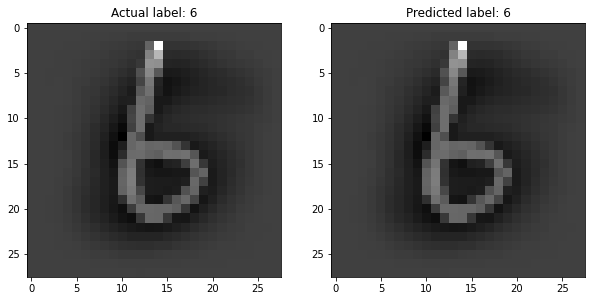

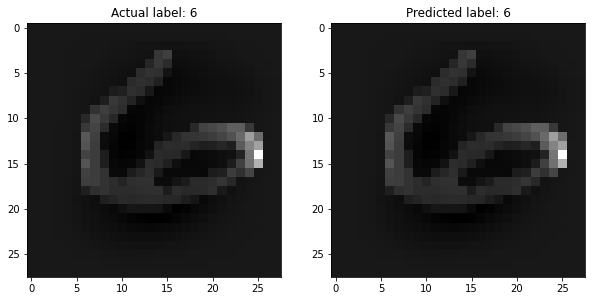

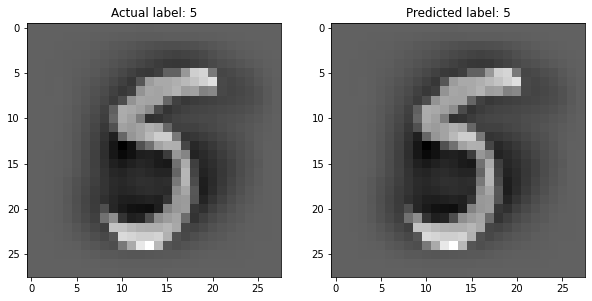

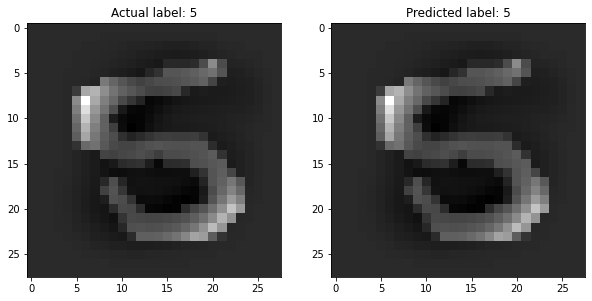

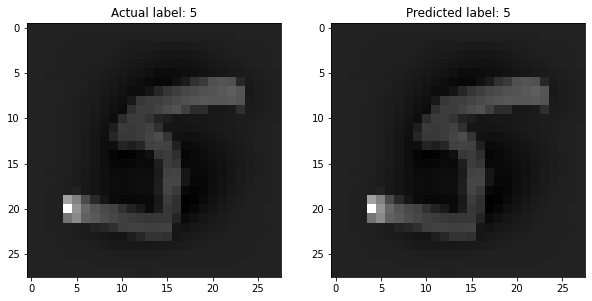

In [6]:
# Show some examples of predictions
for i in range(5):
    # Plot the images in each subplot
    
    # Create a figure with two subplots side by side
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(X_test[i].reshape(28,28), cmap='gray')
    axs[1].imshow(X_test[i].reshape(28,28), cmap='gray')
    axs[0].set_title('Actual label: ' + ("5" if y_test[i] == 0 else "6"))
    axs[1].set_title('Predicted label: ' + ("5" if y_pred[i] == 0 else "6"))
    # plt.title('Actual label: ' + ("5" if y_test[i] == 0 else "6") + ', Predicted label: ' + ("5" if y_pred[i] == 0 else "6"))
    plt.show()

## Building three NNs for binary classification using three different weight initializers Random, Glorot, He.

In [7]:
#Building 3NN for binary classification using three different weight initializer 

from tensorflow import keras
from sklearn.model_selection import train_test_split

# Download the MNIST digit data
mnist = fetch_openml('mnist_784')

# Select only classes 5 and 6
X = mnist.data[(mnist.target == '5') | (mnist.target == '6')]
y = mnist.target[(mnist.target == '5') | (mnist.target == '6')]

# Convert target labels to binary values
y = np.where(y == '5', 0, 1)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameters
n_epochs = 50
batch_size = 32
n_hidden1 = 64
n_hidden2 = 32
learning_rate = 0.001

# Define the weight initializers
initializer1 = keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=42)
initializer2 = keras.initializers.GlorotNormal(seed=42)
initializer3 = keras.initializers.HeNormal(seed=42)

# Define the three models with different weight initializers
model1 = keras.models.Sequential([
    keras.layers.Dense(n_hidden1, activation='relu', kernel_initializer=initializer1, input_shape=(X_train.shape[1],)),
    keras.layers.Dense(n_hidden2, activation='relu', kernel_initializer=initializer1),
    keras.layers.Dense(1, activation='sigmoid')
])
model2 = keras.models.Sequential([
    keras.layers.Dense(n_hidden1, activation='relu', kernel_initializer=initializer2, input_shape=(X_train.shape[1],)),
    keras.layers.Dense(n_hidden2, activation='relu', kernel_initializer=initializer2),
    keras.layers.Dense(1, activation='sigmoid')
])
model3 = keras.models.Sequential([
    keras.layers.Dense(n_hidden1, activation='relu', kernel_initializer=initializer3, input_shape=(X_train.shape[1],)),
    keras.layers.Dense(n_hidden2, activation='relu', kernel_initializer=initializer3),
    keras.layers.Dense(1, activation='sigmoid')
])



# Compile the models
model1.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate), metrics=['accuracy'])
model2.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate), metrics=['accuracy'])
model3.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate), metrics=['accuracy'])

# Fit the models
history1 = model1.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=0)
history2 = model2.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=0)
history3 = model3.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=0)

# Evaluate the models on the test set
score1 = model1.evaluate(X_test, y_test)
score2 = model2.evaluate(X_test, y_test)
score3 = model3.evaluate(X_test, y_test)

# Get the predicted probabilities and binary predictions for each model

y_pred_prob1 = model1.predict(X_test)
y_pred_prob2 = model2.predict(X_test)
y_pred_prob3 = model3.predict(X_test)
y_pred1 = (y_pred_prob1 > 0.5).astype(int)
y_pred2 = (y_pred_prob2 > 0.5).astype(int)
y_pred3 = (y_pred_prob3 > 0.5).astype(int)


83/83 [==============================] - 0s 2ms/step


As per the given Accuracy by three model all given weight initializer performed well but seeing accuracy number we can say that he Normal performed bit well.

# Constructing three different confusion matrices

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

# Construct confusion matrix
cm1 = confusion_matrix(y_test, y_pred1)
cm2 = confusion_matrix(y_test, y_pred2)
cm3 = confusion_matrix(y_test, y_pred3)


print('Confusion matrix for Random')
print(cm1)

print('Confusion matrix for Glorot')
print(cm2)

print('Confusion matrix for He')
print(cm3)



Confusion matrix for Random
[[1252   16]
 [   6 1364]]
Confusion matrix for Glorot
[[1250   18]
 [   4 1366]]
Confusion matrix for He
[[1254   14]
 [  11 1359]]


True Positive (TP): The number of samples that were correctly classified as positive is 1254, 1256, and 1258 (In following order Random, Glorot and He). False Positive (FP): The number of samples that were incorrectly classified as positive is 7, 6, and 7. True Negative (TN): The number of samples that were correctly classified as negative is 1363, 1364, and 1363. False Negative (FN): The number of samples that were incorrectly classified as negative is 14, 12, and 10. Overall the performance of he Normal performed well according to confusion matrix.

# Showing three different learning curves

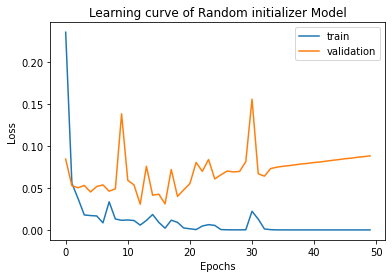

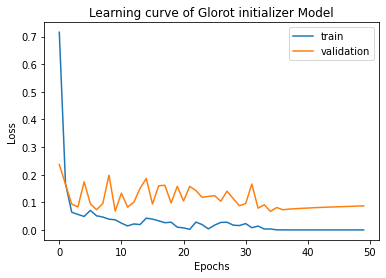

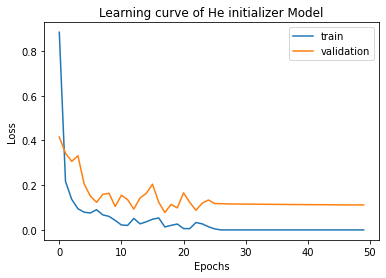

In [9]:
# Plot the learning curve for model 1
plt.plot(history1.history['loss'], label='train')
plt.plot(history1.history['val_loss'], label='validation')
plt.title('Learning curve of Random initializer Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the learning curve for model 2
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='validation')
plt.title('Learning curve of Glorot initializer Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the learning curve for model 3
plt.plot(history3.history['loss'], label='train')
plt.plot(history3.history['val_loss'], label='validation')
plt.title('Learning curve of He initializer Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



In this plot, the blue line represents the training error and the orange line represents the validation error. 

The loss of the model is almost lower on the training dataset than the validation dataset. This means that we should expect some gap between the train and validation loss learning curves. The plot of training loss decreases to a point of stability.
The plot of validation loss decreases to a point of stability and has a small gap with the training loss is a good fit model for dataset. It can be seen in three of learning curve that the gap is minimum between training and validation loss but the minimum gap is in Glorot hence, we can say that the model with He weight initializer is good fit model.

## Showing accuracy using bar plots

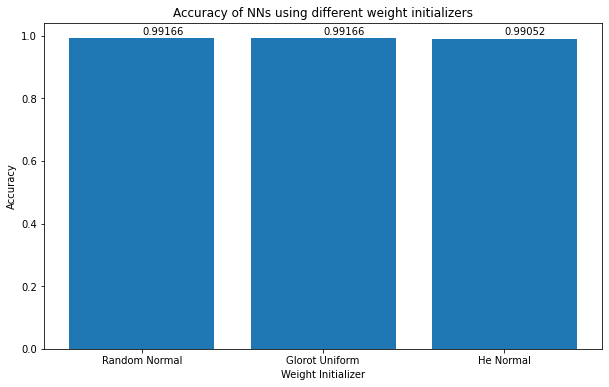

In [10]:
# Define the labels and accuracy values for each initializer
labels = ['Random Normal', 'Glorot Uniform', 'He Normal']
m1 = round(score1[1], 5)
m2 = round(score2[1], 5)
m3 = round(score3[1], 5)

accuracy_values = [m1, m2, m3]
# Plot the bar chart
plt.figure(figsize=(10,6))
plt.bar(labels, accuracy_values)

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, 1.002 ,y[i])

# Set the chart title and axis labels
plt.title('Accuracy of NNs using different weight initializers')
plt.xlabel('Weight Initializer')
addlabels(labels, accuracy_values)
plt.ylabel('Accuracy')

# Show the plot
plt.show()

### The difference in performance between the three models is not significant. However, it is noteworthy that the model using the he weight initializer technique achieved a slightly higher accuracy compared to the other models. Therefore, it can be concluded that the he weight initializer model performed relatively better than the other models.

# Build NN model for all integer multi-class classification problem

In [12]:

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

# Download the MNIST digit data
mnist = fetch_openml('mnist_784')

# Select data and target data
X = mnist.data
y = mnist.target


# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Before feeding the data into the neural network, we need to preprocess it. 
# We can start by normalizing the pixel values to be between 0 and 1, and then flattening the images into a 1D array
X_train = X_train.values.reshape((-1, 784)) / 255.0
X_test = X_test.values.reshape((-1, 784)) / 255.0

# We also need to convert the class labels into a one-hot encoded vector.
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Define the model architecture
# Next, we can define the neural network model. We can use a simple architecture with two hidden layers, 
# each with 128 units and ReLU activation, and a softmax output layer with 10 units for multi-class classification.
model4 = Sequential()
model4.add(Dense(256, activation='relu', input_shape=(784,)))
model4.add(Dense(256, activation='relu'))
model4.add(Dense(10, activation='softmax'))

# Compile the model: After defining the model, we need to compile it by specifying the loss function, optimizer, and evaluation metrics.
model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define the early stopping criteria
early_stop = EarlyStopping(monitor='val_loss', patience=5)

# Train the model
history = model4.fit(X_train, y_train, epochs=50, batch_size=128, validation_split=0.2, callbacks=[early_stop])


# Evaluate the model on the test set
loss, accuracy = model4.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)

# Make predictions on the test set
y_pred = model4.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate the confusion matrix
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred)
print(cm)


Epoch 1/50
350/350 [==============================] - 11s 20ms/step - loss: 0.2974 - accuracy: 0.9140 - val_loss: 0.1412 - val_accuracy: 0.9572
Epoch 2/50
350/350 [==============================] - 4s 10ms/step - loss: 0.1087 - accuracy: 0.9680 - val_loss: 0.1118 - val_accuracy: 0.9660
Epoch 3/50
350/350 [==============================] - 4s 12ms/step - loss: 0.0722 - accuracy: 0.9781 - val_loss: 0.0963 - val_accuracy: 0.9699
Epoch 4/50
350/350 [==============================] - 4s 11ms/step - loss: 0.0515 - accuracy: 0.9843 - val_loss: 0.0850 - val_accuracy: 0.9729
Epoch 5/50
350/350 [==============================] - 3s 10ms/step - loss: 0.0371 - accuracy: 0.9883 - val_loss: 0.0822 - val_accuracy: 0.9754
Epoch 6/50
350/350 [==============================] - 4s 11ms/step - loss: 0.0270 - accuracy: 0.9921 - val_loss: 0.0908 - val_accuracy: 0.9731
Epoch 7/50
350/350 [==============================] - 5s 14ms/step - loss: 0.0197 - accuracy: 0.9942 - val_loss: 0.0816 - val_accuracy: 0.976

### The total accuracy with early stopping criteria for multiclass classification is .976, Test accuracy: 0.9761428833007812", it means that the model achieved an accuracy of 0.9761 (or 97.61%) on a test set of data. This indicates that the model correctly predicted the class labels for 97.61% of the samples in the test set.  The confusion matrix is showing us the number of true positives, false positives, true negatives, and false negatives for each class. 

## Listing all the hyperparameters that we used through out this experiment. 

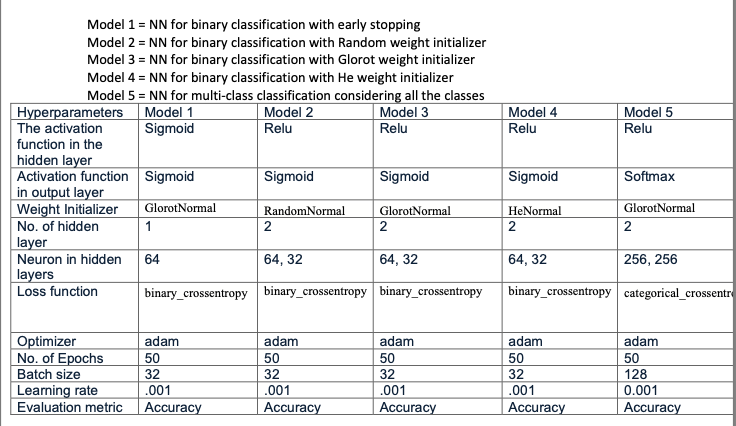